### Project Overview:
A bank has observed a decline in customers using its banking services, prompting concerns about potential customer attrition. As a data analyst, I aim to investigate the underlying causes of customer churn and develop predictive models to forecast future attrition.

#### Objectives:
1. Identify key factors contributing to customer attrition using exploratory data analysis and feature selection techniques.
2. Develop classification models to predict the likelihood of customer attrition based on selected features.
3. Provide insights and recommendations to help the bank understand current customer behavior, retain existing customers, and acquire new ones.

#### Methodology:
1. Data collection and preprocessing.
2. Exploratory data analysis (EDA).
3. Feature engineering.
4. Extracting relevant features in the data that can used for model building.
5. Classification model development and evaluation.
6. Handling the imbalanced data.
7. Results interpretation and insights generation

#### Expect Outcomes:
1. A comprehensive understanding of the factors driving customer attrition.
2. Accurate predictive models for identifying high-risk customers.

In [93]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
sns.set_style("white")

In [95]:
# Setting the format in data to two decimal places 
pd.options.display.float_format = '{:,.2f}'.format

In [96]:
customers_data = pd.read_csv('data/Churn_Customers.csv')
customers_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.00,2,0.00,1,1,1,"101,348.88",1
1,15647311,608,Spain,Female,41.00,1,"83,807.86",1,0,1,"112,542.58",0
2,15619304,502,France,Female,42.00,8,"159,660.80",3,1,0,"113,931.57",1
3,15701354,699,France,Female,39.00,1,0.00,2,0,0,"93,826.63",0
4,15737888,850,Spain,Female,43.00,2,"125,510.82",1,1,1,"79,084.10",0


In [97]:
# Checking for number of rows and columns shape and data types
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [98]:
# Checking for the numbe of null values in a column
customers_data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [99]:
# Getting the statistical description of the column
customers_data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,"10,000.00","10,000.00","9,994.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","9,996.00","10,000.00"
mean,"15,690,940.57",650.53,38.93,5.01,"76,485.89",1.53,0.71,0.52,"100,074.74",0.20
std,"71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,515.77",0.40
min,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"50,974.08",0.00
50%,"15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,168.24",0.00
75%,"15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [100]:
# Impute the missing values in EstimatedSalary, since the column is continuous  filling in the missing values with the mean of the data in that column

mean_salary = customers_data['EstimatedSalary'].mean()

customers_data['EstimatedSalary'] = customers_data['EstimatedSalary'].fillna(mean_salary)

In [101]:
customers_data['Gender'].value_counts()

Gender
Male      5453
Female    4543
Name: count, dtype: int64

In [102]:
# From the above it has been obsevred that more males(5453) when compared to females(4543). 
# As a rule of thumb, you fill the missing values with the more frequently occurring entry,which in this case is Male

customers_data['Gender'] = customers_data['Gender'].fillna(customers_data['Gender'].value_counts().idxmax())

In [103]:
# For Age, replace the missing values with the mode of the values in the column
customers_data['Age'].mode()[0]

37.0

In [104]:
mode_value = customers_data['Age'].mode()[0]
customers_data['Age'] = customers_data.Age.fillna(mode_value)

In [105]:
# Check if there are any null values

customers_data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [106]:
# Renaming the columns

customers_data = customers_data.rename(columns = {'CredRate' : 'Credit Score', 'ActMem' : 'IsanActiveMember', 'Prod Number' : 'Number of Products',
                                                  'Exited' : 'Churn'})

In [107]:
# Checking whether the columns has been renamed
customers_data.columns

Index(['CustomerId', 'Credit Score', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Number of Products', 'HasCrCard', 'IsanActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [108]:
# Removing the customerId column as it does not provide any useful information and moving the churn column to the right 
customers_data.drop(labels=['CustomerId'], axis=1,inplace = True)
column_churn = customers_data['Churn']
customers_data.drop(labels=['Churn'], axis=1,inplace = True)
customers_data.insert(len(customers_data.columns), 'Churn', column_churn.values)

In [109]:
# Changing the data type of the Geography, Gender, HasCrCard, Churn, and IsActiveMember columns to categorical variables

customers_data['Geography'] = customers_data['Geography'].astype('category')
customers_data['Gender'] = customers_data['Gender'].astype('category')
customers_data['HasCrCard'] = customers_data['HasCrCard'].astype('category')
customers_data['Churn'] = customers_data['Churn'].astype('category')
customers_data['IsanActiveMember'] = customers_data['IsanActiveMember'].astype('category')

In [110]:
customers_data.dtypes

Credit Score             int64
Geography             category
Gender                category
Age                    float64
Tenure                   int64
Balance                float64
Number of Products       int64
HasCrCard             category
IsanActiveMember      category
EstimatedSalary        float64
Churn                 category
dtype: object

In [111]:
# The churn column has two attributes: 0 indicates that the customer did not churn and 1 implies that the customer churned
# Finding the percentages of Customers who have churned and not churned

customers_data['Churn'].value_counts(1) * 100

Churn
0   79.63
1   20.37
Name: proportion, dtype: float64

##### This gave us an output of 79.63 and 20.37 percent corresponding to the customers that did not churn and those that churned, respectively.

In [112]:
# Percentage of customers that have a credit card

customers_data['HasCrCard'].value_counts(1) * 100

HasCrCard
1   70.55
0   29.45
Name: proportion, dtype: float64

In [113]:
# Inspect the mean attributes of customers who churned compared to those who did not churn

summary_data = customers_data.groupby('Churn')
summary_data.mean(numeric_only=True)

,Credit Score,Age,Tenure,Balance,Number of Products,EstimatedSalary
Churn,,,,,,
0,651.85,37.41,5.03,"72,745.30",1.54,"99,718.93"
1,645.35,44.84,4.93,"91,108.54",1.48,"101,465.68"


In [114]:
summary_data.median(numeric_only=True)

,Credit Score,Age,Tenure,Balance,Number of Products,EstimatedSalary
Churn,,,,,,
0,653.00,36.00,5.00,"92,072.68",2.00,"99,645.04"
1,646.00,45.00,5.00,"109,349.29",1.00,"102,460.84"


In [115]:
# Setting the format in data to four decimal places 
pd.options.display.float_format = '{:,.4f}'.format

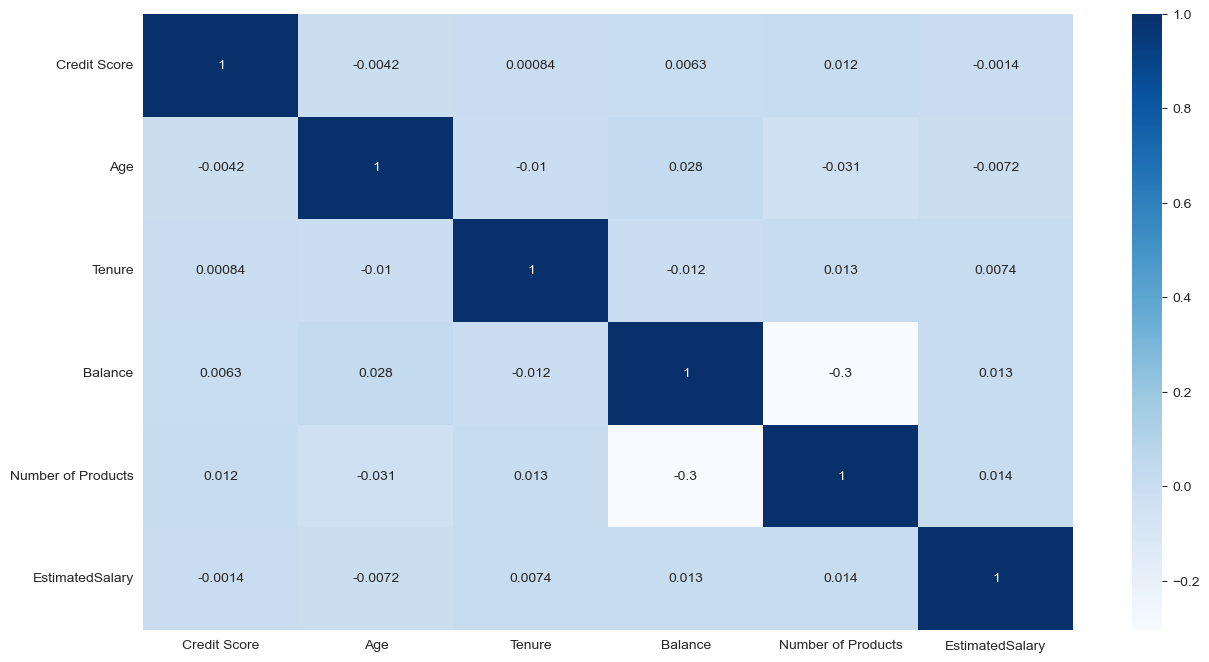

In [116]:
# Select only numeric columns
numeric_cols = customers_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate pearson correlation
corr = customers_data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='Blues');

##### NumOfProducts and Balance have a negative correlation of –0.304, whereas Balance and Age have a positive correlation of 0.028. A change in NumOfProducts will have a stronger effect on Balance than it will on Age

#### Plot the distribution graph of the customers for the EstimatedSalary, Age, and Balance variables

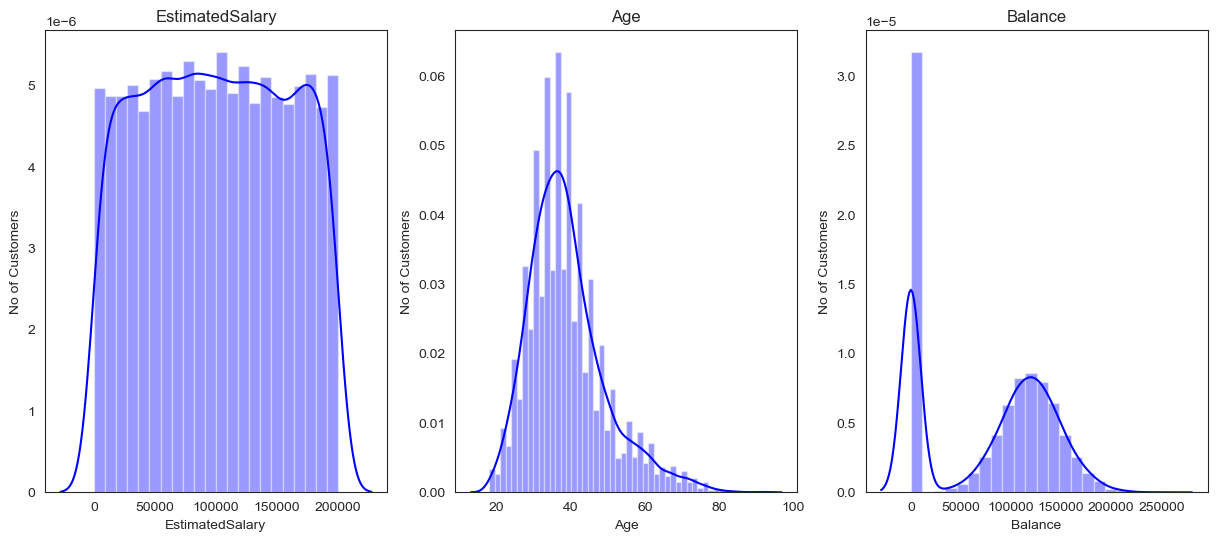

In [117]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(customers_data.EstimatedSalary, kde=True, color="blue", ax=axes[0]).set_title('EstimatedSalary'), axes[0].set_ylabel('No of Customers')
sns.distplot(customers_data.Age, kde=True, color="blue", ax=axes[1]).set_title('Age'), axes[1].set_ylabel('No of Customers')
sns.distplot(customers_data.Balance, kde=True, color="blue", ax=axes[2]).set_title('Balance'), axes[2].set_ylabel('No of Customers');

### Observations : 

1. The estimated salary distribution appears to be an uneven distribution, which means that the number of customers is essentially constant for a significant range of projected salaries.
2. Age is a right-skewn normal distribution. The majority of our customers are between the ages of 30 and 45.
3. The distribution of balance is bimodal, meaning that there are two balance values for which the number of clients is atypically high. There are a lot of customers with low balances, which appears to be an anomaly.

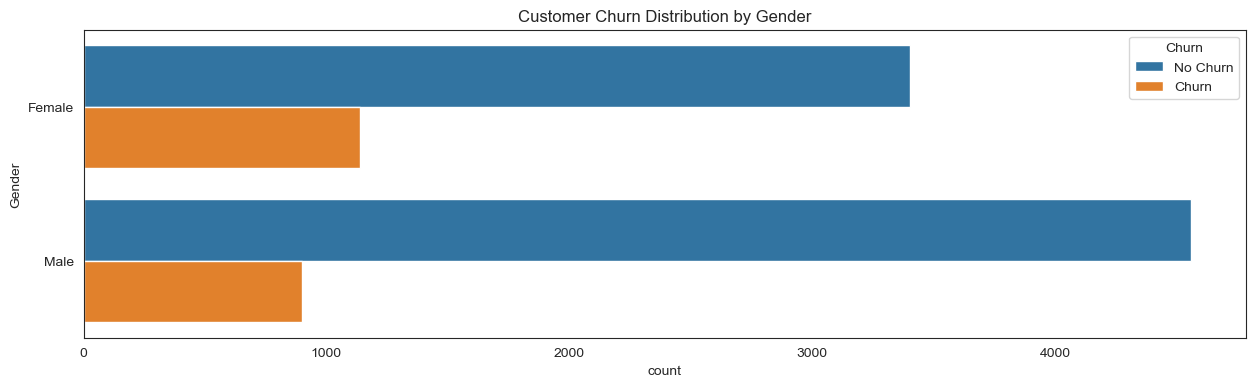

In [118]:
# Check whether there is a difference in churn for Gender using bivariate analysis
plt.figure(figsize=(15,4))
p=sns.countplot(y=customers_data['Gender'], hue = 'Churn', data=customers_data)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender');

#### From the above figure, It has have observed that more female customers have churned.

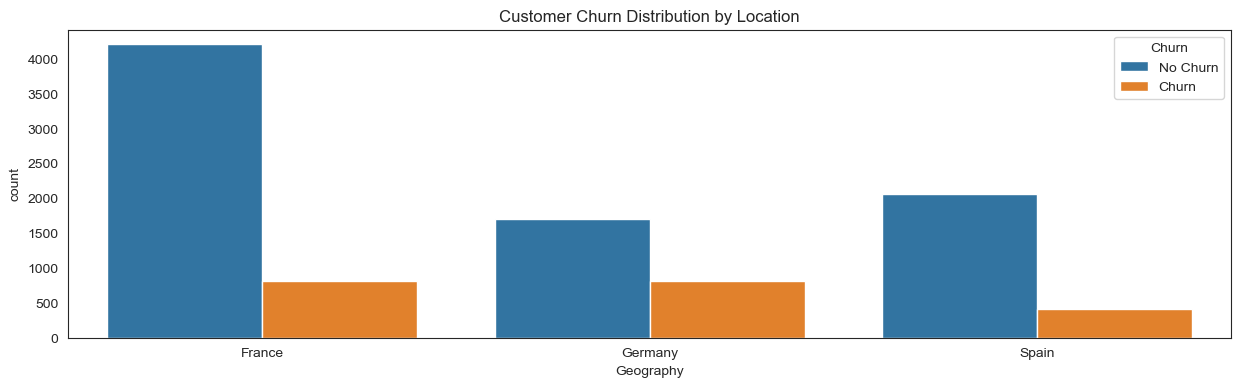

In [119]:
# Check whether there is a difference in churn for Geograohy using bivariate analysis
plt.figure(figsize=(15,4))
p=sns.countplot(x=customers_data['Geography'], hue = 'Churn', data=customers_data)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Location');

#### France has a highest number of customers that did not churn compared to the Germany and Spain.

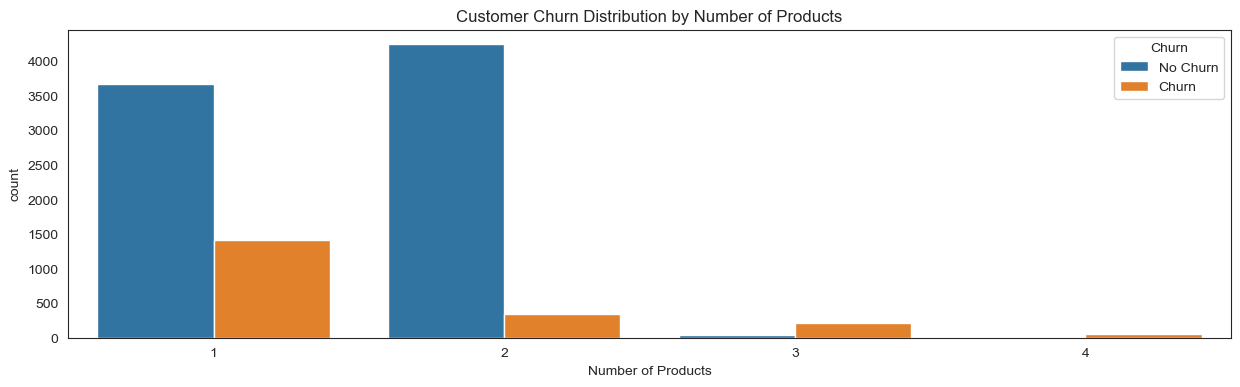

In [120]:
# Check whether there is a difference in churn for NumofProducts using bivariate analysis
plt.figure(figsize=(15,4))
p=sns.countplot(x=customers_data['Number of Products'], hue = 'Churn', data=customers_data)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Number of Products');

#### Largest proportion of customers who have churned are found at product 1 whereas largest proportion of customers who have not churned are found at 2.

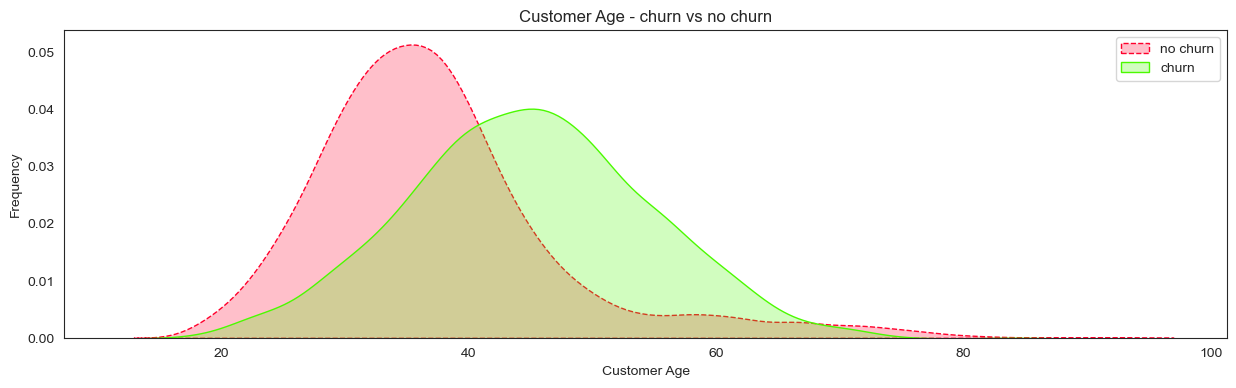

In [121]:
# Inspect churn versus Age
plt.figure(figsize=(15,4))
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 0),'Age'] , color=sns.color_palette("prism_r")[0], shade=True,label='no churn', linestyle='--')
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 1),'Age'] , color=sns.color_palette("prism_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')
plt.legend();

#### Customers seem to churn more frequently between the ages of 35 and 45. Customers tend to churn more when they get older.

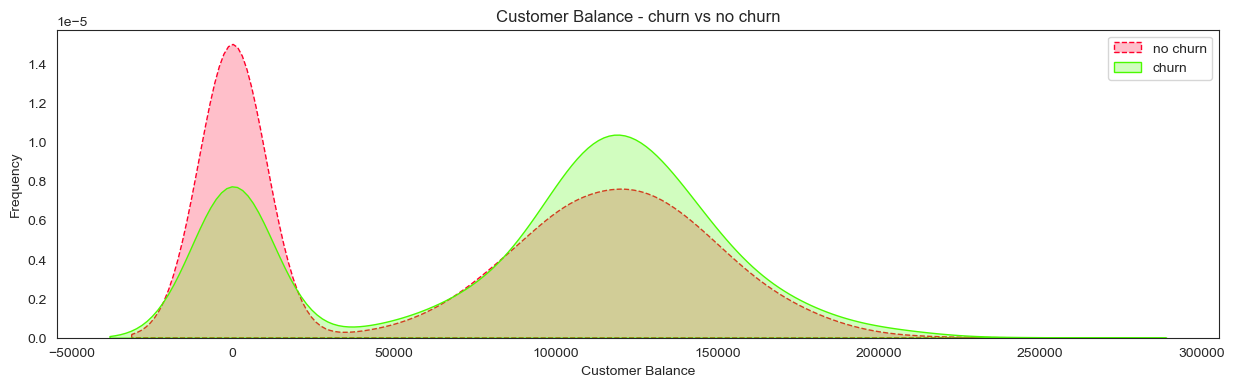

In [122]:
#Inspect balance versus churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 0),'Balance'] , color=sns.color_palette("prism_r")[0], shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 1),'Balance'] , color=sns.color_palette("prism_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')
plt.legend();

#### Consumers with balances between 75,000 and 150,000 dollars had lower churn than those with negative or low balances.

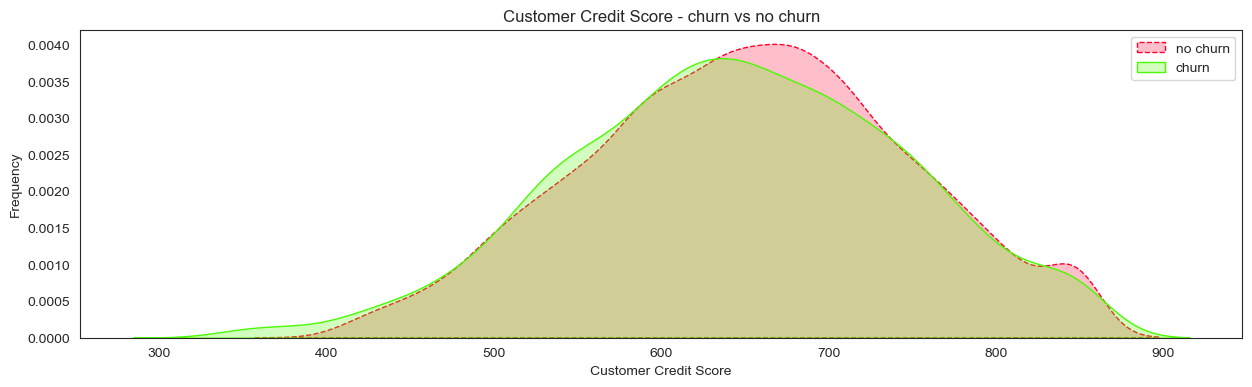

In [123]:
#Inspect CreditScore versus churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 0),'Credit Score'] , color=sns.color_palette("prism_r")[0], shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 1),'Credit Score'] , color=sns.color_palette("prism_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Credit Score', ylabel='Frequency')
plt.title('Customer Credit Score - churn vs no churn')
plt.legend();

#### The majority of customers who left had credit scores of about 600, while those who stayed had scores of about 650.

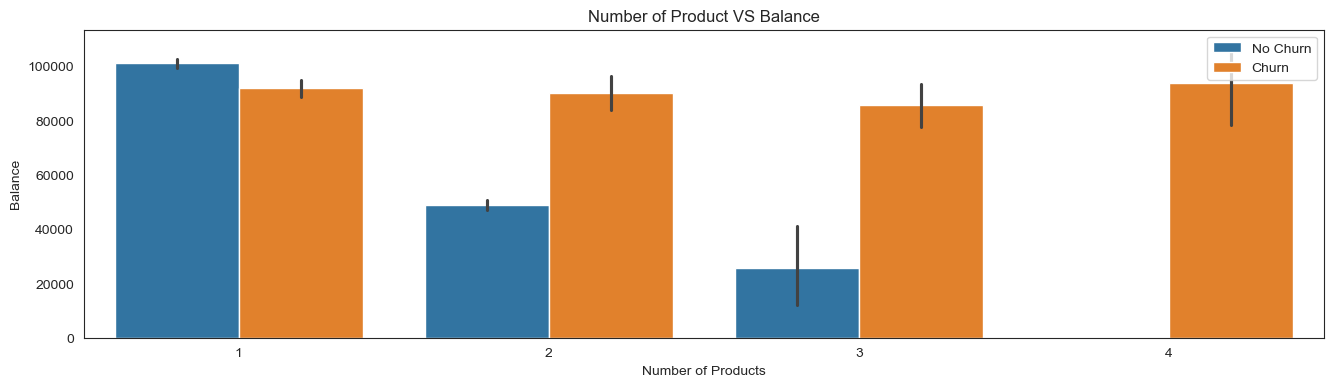

In [124]:
plt.figure(figsize=(16,4))
p=sns.barplot(x='Number of Products',y='Balance',hue='Churn', data=customers_data)
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Product VS Balance');

#### The balance for lost customers doesn't change even when the quantity of products rises.

### Selecting the six most most important features using a tree-based method, making it easier to build a strong classification model.

In [125]:
# Import the libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [126]:
customers_data.dtypes

Credit Score             int64
Geography             category
Gender                category
Age                    float64
Tenure                   int64
Balance                float64
Number of Products       int64
HasCrCard             category
IsanActiveMember      category
EstimatedSalary        float64
Churn                 category
dtype: object

In [127]:
### Encoding the categorical variables
customers_data["Geography"] = customers_data["Geography"].astype('category').cat.codes
customers_data["Gender"] = customers_data["Gender"].astype('category').cat.codes
customers_data["HasCrCard"] = customers_data["HasCrCard"].astype('category').cat.codes
customers_data["Churn"] = customers_data["Churn"].astype('category').cat.codes

In [128]:
# Split the data into train and test set
target = 'Churn'
X = customers_data.drop('Churn', axis=1)
y = customers_data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [129]:
# Define ensemble models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=500, random_state=1),
    'AdaBoost': AdaBoostClassifier(n_estimators=500, random_state=1),
    'Extra Trees': ExtraTreesClassifier(n_estimators=500, random_state=1),
    'XGBoost': xgb.XGBClassifier(n_estimators=500, random_state=1, enable_categorical=True)
}

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)
    if name == 'XGBoost':
        importances = model.feature_importances_
    else:
        importances = model.feature_importances_
    features = X_train.columns
    
    indices = np.argsort(importances)[::-1]
    print(f" Model accuracy for {name} : {model.score(X_test, y_test)}")

 Model accuracy for Random Forest : 0.8653333333333333
 Model accuracy for Gradient Boosting : 0.8673333333333333
 Model accuracy for AdaBoost : 0.856
 Model accuracy for Extra Trees : 0.86
 Model accuracy for XGBoost : 0.842


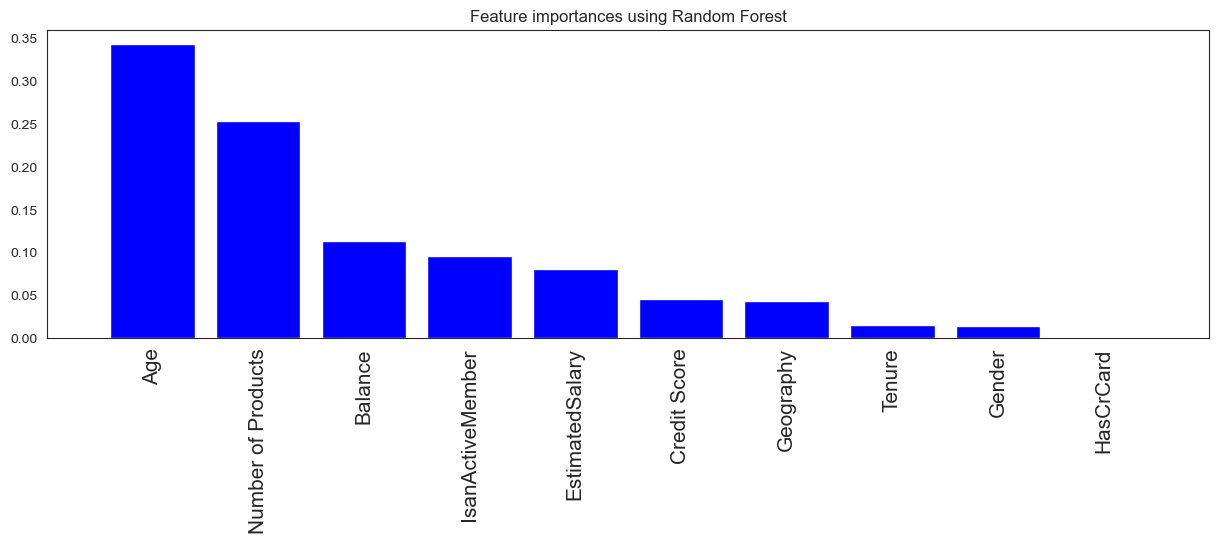

In [130]:
# Define ensemble models
model =  GradientBoostingClassifier(n_estimators=500, random_state=1)

model.fit(X_train,y_train)

# Store non-target columns in the 'features' variable and sort important features using NumPy's argsort function
importances=model.feature_importances_
features = customers_data.drop(['Churn'],axis=1).columns

indices = np.argsort(importances)[::-1]
# Plot the important features obtained from the Gradient boost classifier
plt.figure(figsize=(15,4)) 
plt.title("Feature importances using Random Forest") 
plt.bar(range(X_train.shape[1]), importances[indices],\
        color="blue", align="center") 
plt.xticks(range(X_train.shape[1]), features[indices], \
           rotation='vertical',fontsize=15) 
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [131]:
feature_importance_df = pd.DataFrame({"Feature":features,\
                                      "Importance":importances})

print(feature_importance_df)

              Feature  Importance
0        Credit Score      0.0451
1           Geography      0.0428
2              Gender      0.0134
3                 Age      0.3427
4              Tenure      0.0149
5             Balance      0.1124
6  Number of Products      0.2524
7           HasCrCard      0.0009
8    IsanActiveMember      0.0950
9     EstimatedSalary      0.0804


### Developing a logistic regression model with the top six features to predict customer churn.

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
top6_features = ['Age','EstimatedSalary','Credit Score','Balance','Number of Products', 'IsanActiveMember']

In [134]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top6_features], y_train)

In [135]:
clf.predict(X_test[top6_features])
clf.predict_proba(X_test[top6_features])

array([[0.66549927, 0.33450073],
       [0.80339047, 0.19660953],
       [0.66313872, 0.33686128],
       ...,
       [0.69368363, 0.30631637],
       [0.90566935, 0.09433065],
       [0.79270947, 0.20729053]])

#### The probability of customer churn is 33.45% (churn) and 66.54% (no churn), based on the first set of output: [0.66549927, 0.33450073].

In [136]:
clf.score(X_test[top6_features], y_test)

0.7993333333333333

#### The model achieved an accuracy of 79% on the test dataset, indicating its reliability in predicting customer churn.

In [138]:
print('accuracy for CV is:%.3f' % np.mean(results))

accuracy for CV is:0.806


### Performing Standarization

In [139]:
from sklearn import preprocessing

In [140]:
X_train[top6_features].head()

,Age,EstimatedSalary,Credit Score,Balance,Number of Products,IsanActiveMember
490,29.0000,"196,356.1700",591,"97,541.2400",1,1
5555,39.0000,"164,018.9800",614,0.0000,2,1
9235,27.0000,"80,587.2700",462,"176,913.5200",1,0
6594,40.0000,"57,817.8400",747,0.0000,1,0
6671,49.0000,"187,811.7100",677,0.0000,2,1


In [141]:
scaler = preprocessing.StandardScaler().fit(X_train[top6_features]) 
X_train_scalar=pd.DataFrame(scaler.transform(X_train[top6_features]),columns = X_train[top6_features].columns) 
X_test_scalar=pd.DataFrame(scaler.transform(X_test[top6_features]),columns = X_test[top6_features].columns)

In [142]:
X_train_scalar.head()

,Age,EstimatedSalary,Credit Score,Balance,Number of Products,IsanActiveMember
0,-0.9556,1.6742,-0.6111,0.3428,-0.9110,0.9703
1,0.0087,1.1112,-0.3727,-1.2196,0.8117,0.9703
2,-1.1484,-0.3411,-1.9481,1.6142,-0.9110,-1.0306
3,0.1051,-0.7375,1.0058,-1.2196,-0.9110,-1.0306
4,0.9730,1.5254,0.2803,-1.2196,0.8117,0.9703


In [143]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train_scalar, y_train)

In [144]:
clf.predict(X_test_scalar)
clf.predict_proba(X_test_scalar)

array([[0.39078997, 0.60921003],
       [0.83813483, 0.16186517],
       [0.65298766, 0.34701234],
       ...,
       [0.66498423, 0.33501577],
       [0.93582247, 0.06417753],
       [0.78827849, 0.21172151]])

#### The probability of customer churn is 39.07% (churn) and 60.92% (no churn), based on the first set of output: [0.39078997, 0.60921003].

In [145]:
clf.score(X_test_scalar, y_test)

0.8013333333333333

#### The model has improved accuracy of 80.1% on the test dataset upon preprocessing, indicating its reliability in predicting customer churn.

#### Avoiding Overfitting and Improving Model Evaluation:

When training a model, it's essential to split the data into training and testing datasets to prevent overfitting. Overfitting occurs when a model performs well on the training data but poorly on the testing data.
In scikit-learn, the train_test_split function randomly splits the data into training and testing sets.

#### Cross-Validation: A Better Approach:
To improve model evaluation, cross-validation is a better approach than simply splitting the data into training and testing sets. Cross-validation involves:
1. Splitting the training data into k smaller sets (folds)
2. Training the model on k-1 folds and evaluating on the remaining fold.
3. Repeating steps 1-2 k times.
4. Calculating the overall average score.

#### Stratified K-Fold for Imbalanced Datasets:
For datasets with class imbalance, stratified k-fold is used to maintain class proportions in each fold. This ensures that the model is evaluated on a representative sample of the data.

In [146]:
# Model Evaluation using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

results_cross_val_score=cross_val_score(estimator=clf,X=X_train_scalar.values,y=y_train.values,cv=10,n_jobs=1) 
print('accuracy for CV is:%.3f '% np.mean(results_cross_val_score))

accuracy for CV is:0.806 


In [147]:
results_cross_val_score

array([0.8       , 0.81176471, 0.80823529, 0.81647059, 0.81058824,
       0.81176471, 0.79882353, 0.80117647, 0.79411765, 0.80588235])

In [148]:
# Model Evaluation using Stratified K-Fold
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10).split(X_train_scalar.values,y_train.values) 
results=[]
for i, (train,test) in enumerate(skf):
    clf.fit(X_train_scalar.values[train], y_train.values[train])
    fit_result=clf.score(X_train_scalar.values[test],y_train.values[test])
    results.append(fit_result)
    print('k-fold: %2d, Class Ratio: %s, Accuracy: %.4f'% (i,np.bincount(y_train.values[train]),fit_result))

k-fold:  0, Class Ratio: [6092 1558], Accuracy: 0.8000
k-fold:  1, Class Ratio: [6092 1558], Accuracy: 0.8118
k-fold:  2, Class Ratio: [6092 1558], Accuracy: 0.8082
k-fold:  3, Class Ratio: [6092 1558], Accuracy: 0.8165
k-fold:  4, Class Ratio: [6092 1558], Accuracy: 0.8106
k-fold:  5, Class Ratio: [6092 1558], Accuracy: 0.8118
k-fold:  6, Class Ratio: [6092 1558], Accuracy: 0.7988
k-fold:  7, Class Ratio: [6092 1558], Accuracy: 0.8012
k-fold:  8, Class Ratio: [6092 1558], Accuracy: 0.7941
k-fold:  9, Class Ratio: [6093 1557], Accuracy: 0.8059


In [149]:
gbk_clf = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0
)

gbk_clf.fit(X_train_scalar,y_train)

y_pred = gbk_clf.predict(X_test_scalar)

target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.87      0.97      0.92      1194
       Churn       0.79      0.43      0.56       306

    accuracy                           0.86      1500
   macro avg       0.83      0.70      0.74      1500
weighted avg       0.85      0.86      0.84      1500



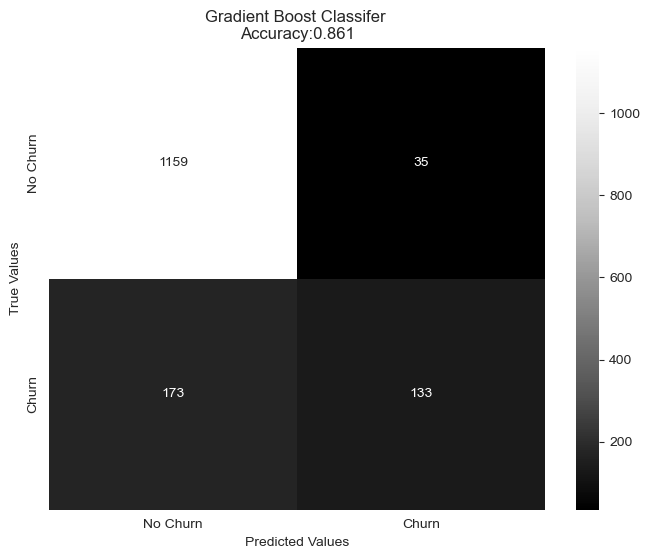

In [150]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm, index = ['No Churn','Churn'], columns = ['No Churn','Churn'])

plt.figure(figsize=(8,6)) 
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r') 
plt.title('Gradient Boost Classifer \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred))) 
plt.ylabel('True Values') 
plt.xlabel('Predicted Values') 
plt.show()

#### The Gradient Boosting Classifier model achieves an overall F1 score of 0.84. However, the F1 score for customers who have churned is 56%. This disparity is a consequence of the highly imbalanced dataset, which hinders the model's ability to generalize and accurately predict customer churn.

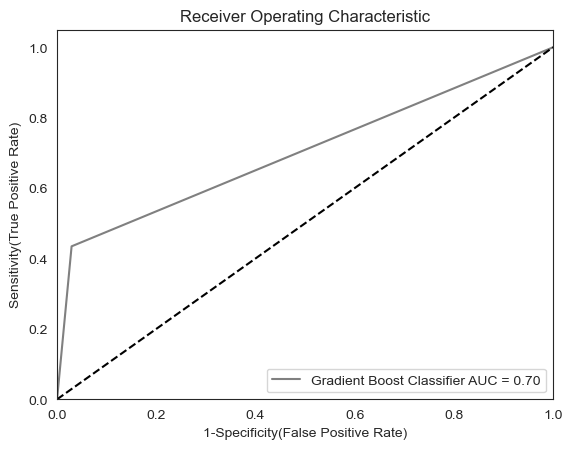

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='%s AUC = %0.2f' % ('Gradient Boost Classifier', roc_auc), color='gray')

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##### The model's Area Under the Curve (AUC) score is 0.70, which is relatively low compared to its high F1 score of 0.84. Although the False Positive Rate (FPR) is close to 0, the True Positive Rate (TPR) is only around 0.4.

### Handling Data Imbalance: Sampling Methods:

Data imbalance occurs when one class dominates the other. To address this:
1. Random Under-sampling:
   • Randomly remove samples from the majority class to match the minority class.
   • Limitation: Throws away valuable information.

2. Random Over-sampling:
   • Randomly duplicate minority class samples to balance the dataset.
   • Limitation: Creates duplicates, potentially leading to overfitting.


3. SMOTE (Synthetic Minority Over-sampling Technique):
   • Creates synthetic samples using KNN and minority class examples.
   • Creates larger decision regions and Improves minority class capture.
   • Limitation: May introduce noise if minority class is not distinct.

These methods can help alleviate data imbalance, but it's essential to choose the most suitable approach for the specific problem.

In [152]:
# This is the pipeline module we need from imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomUnderSampler()
model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=0)

# Define the pipeline,and combine sampling method with the GB model
pipeline = Pipeline([('RandomUnderSampler', resampling), ('GB', model)])

pipeline.fit(X_train_scalar, y_train) 
predicted = pipeline.predict(X_test_scalar)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted, target_names=target_names))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

    No Churn       0.92      0.80      0.85      1194
       Churn       0.48      0.73      0.58       306

    accuracy                           0.78      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.83      0.78      0.80      1500

Confusion matrix:
 [[952 242]
 [ 82 224]]


In [153]:
# This is the pipeline module we need from imblearn
from imblearn.over_sampling import RandomOverSampler

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomOverSampler()
model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=0)

# Define the pipeline,and combine sampling method with the GB model
pipeline = Pipeline([('RandomOverSampler', resampling), ('GB', model)])

pipeline.fit(X_train_scalar, y_train) 
predicted = pipeline.predict(X_test_scalar)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted, target_names=target_names))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

    No Churn       0.92      0.75      0.83      1194
       Churn       0.43      0.74      0.55       306

    accuracy                           0.75      1500
   macro avg       0.68      0.75      0.69      1500
weighted avg       0.82      0.75      0.77      1500

Confusion matrix:
 [[898 296]
 [ 79 227]]


In [154]:
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Define the pipeline with imputer, SMOTE, and Gradient Boosting Classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('smote', SMOTE(random_state=0)),  # Apply SMOTE oversampling
    ('gb', GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=0))
])

pipeline.fit(X_train_scalar, y_train)
predicted = pipeline.predict(X_test_scalar)

# Obtain the results from the classification report and confusion matrix
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.82      1194
           1       0.43      0.75      0.55       306

    accuracy                           0.75      1500
   macro avg       0.68      0.75      0.69      1500
weighted avg       0.82      0.75      0.77      1500

Confusion matrix:
 [[893 301]
 [ 78 228]]


## Insights from the data :

• Customers who did not churn made up 79.63% (7,963) of the total, while 20.37% (2,037) of the consumers did.

• On average, the consumers who left had an average age of 44.83 years and an average credit score of 645.35.

• Compared to non-churning consumers, churning customers have an average balance of 911 dollars and an anticipated salary of 108.53 dollars, versus 101 dollars and 465.67 dollars, respectively.

• The median quantity of products acquired by the consumers who have churned is one.

• There is a 29% positive Pearson correlation between customer age and churn.

• There is a 12% positive Pearson correlation between balance and churn.

• There is a 30% negative Pearson correlation between the customer's balance and the quantity of products purchased.

• Compared to France, Germany and Spain have less differences between churning and non-churning clients.

• On balance, a higher number of female clients have left. Customers who have bought three or four products see higher levels of turnover.

• Customers in the 35–45 age range appear to be more likely to leave. Customers tend to churn more when they get older

• Customers with a negative or low balance see less turnover than those with a balance between 75,000 and 150,000 dollars.

• The top features identified through tree-based(Gradient Boost Classifier) feature selection are Age, Estimated Salary, IsanActiveMember, Credit Score, Balance, and Number of Products.

• Using logistic regression the model has 79% accuracy on the test dataset for the customer churn prediction model.

• Utilizing cross-validation with stratified k-fold, the model demonstrated a consistently high accuracy of 79%.

• The ensemble-based Gradient Boosting Classifier achieved a respectable overall F1 score is 84%. Nonetheless, the model struggled to accurately predict customer churn, evident from the alarmingly low F1 score of 56% for churned customers. This disparity underscores the inherent challenge of addressing class imbalance in the dataset.

• The model's Area Under the Curve (AUC) score is 0.70, which is relatively low compared to its high F1 score of 84%. Although the False Positive Rate (FPR) is close to 0, the True Positive Rate (TPR) is above 0.4.

• By applying Random under sampling to address class imbalance, the model achieving an overall F1 score of 80% and an F1 score of over 58% for churned customers.